#### Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
import joblib

#### Import Dataset

In [4]:
cars_df = pd.read_csv('true_car_listings.csv', usecols=['Price', 'Mileage', 'Make', 'Model'])
cars_df.head(3)

,Price,Mileage,Make,Model
0,8995,35725,Acura,ILX6-Speed
1,10888,19606,Acura,ILX5-Speed
2,8995,48851,Acura,ILX6-Speed


## DF Properties

#### Shape

In [5]:
cars_df.shape

(852122, 4)

#### Columns

In [6]:
cars_df.columns

Index(['Price', 'Mileage', 'Make', 'Model'], dtype='object')

#### Correlations

In [7]:
cars_df.corr(numeric_only=True)

,Price,Mileage
Price,1.000000,-0.421237
Mileage,-0.421237,1.000000


#### Info

In [8]:
cars_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 852122 entries, 0 to 852121
Data columns (total 4 columns):
 #   Column   Non-Null Count   Dtype 
---  ------   --------------   ----- 
 0   Price    852122 non-null  int64 
 1   Mileage  852122 non-null  int64 
 2   Make     852122 non-null  object
 3   Model    852122 non-null  object
dtypes: int64(2), object(2)
memory usage: 26.0+ MB


## Data Cleaning

#### Remove Duplicates

In [9]:
cars_df.duplicated().sum()

1008

In [10]:
cars_df.drop_duplicates(inplace=True, ignore_index=True)

In [11]:
cars_df.shape

(851114, 4)

#### Remove Nulls

In [12]:
cars_df.isnull().sum()

Price      0
Mileage    0
Make       0
Model      0
dtype: int64

## EDA

#### Numerical Columns

## Price

<Figure size 1200x400 with 0 Axes>

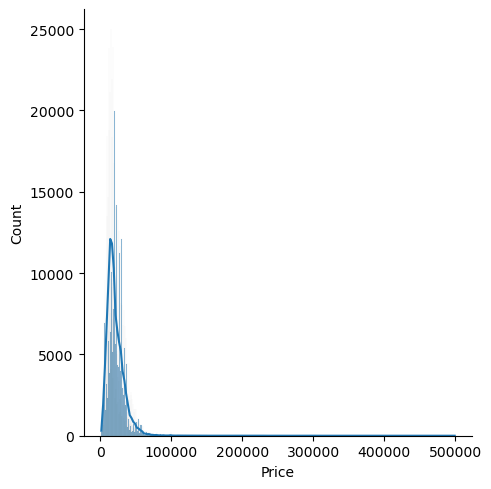

In [20]:
plt.figure(figsize=(12, 4))
sns.displot(x = 'Price', kde = True, data = cars_df)

plt.show()

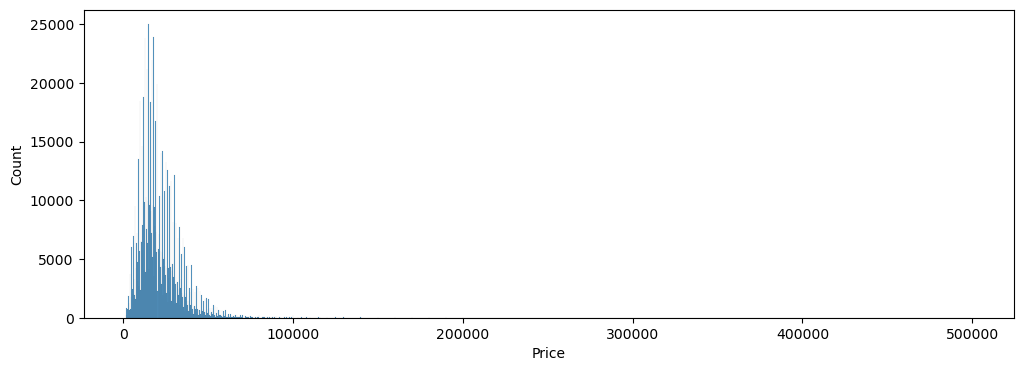

In [21]:
plt.figure(figsize = (12, 4))
sns.histplot(x = 'Price', data = cars_df)

plt.show()

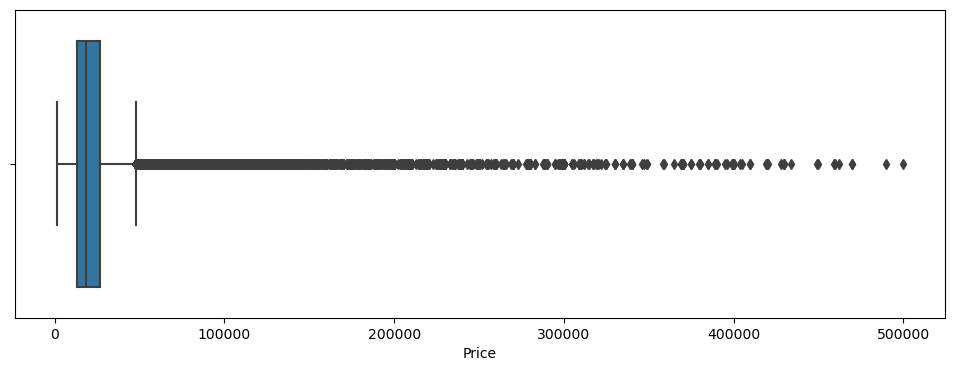

In [22]:
plt.figure(figsize=(12, 4))
sns.boxplot(x = 'Price', data = cars_df)

plt.show()

## Mileage

<Figure size 1200x400 with 0 Axes>

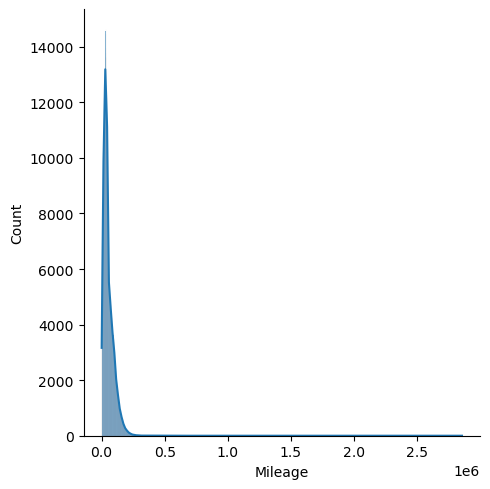

In [23]:
plt.figure(figsize=(12, 4))
sns.displot(x = 'Mileage', kde = True, data = cars_df)

plt.show()

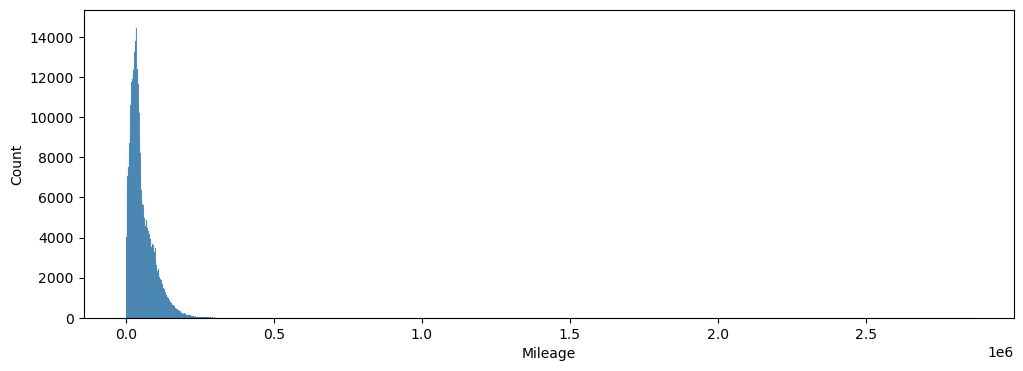

In [24]:
plt.figure(figsize = (12, 4))
sns.histplot(x = 'Mileage', data = cars_df)

plt.show()

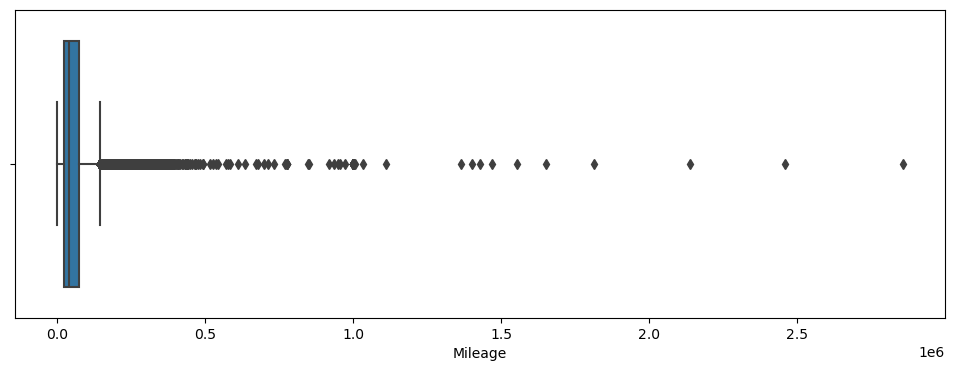

In [25]:
plt.figure(figsize=(12, 4))
sns.boxplot(x = 'Mileage', data = cars_df)

plt.show()

## Make

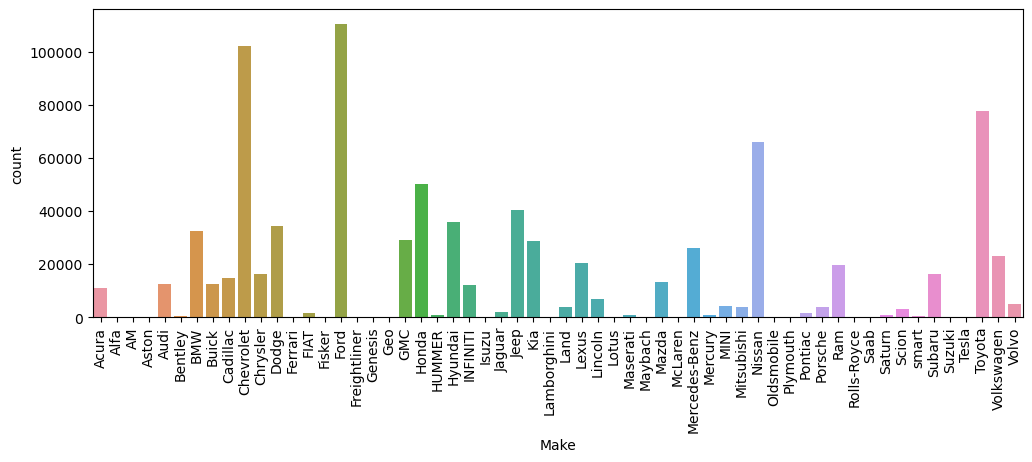

In [29]:
plt.figure(figsize=(12, 4))
sns.countplot(x = 'Make', data = cars_df)
plt.xticks(rotation=90)
plt.show()

## Data Preprocessing

#### Column Transformer

In [31]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler, OrdinalEncoder

ct = ColumnTransformer(transformers=[('OneHotEncoding', OneHotEncoder(drop='first', handle_unknown='ignore', sparse_output=True), ['Make','Model']),
                                     ('MinMaxScaler', MinMaxScaler(), ['Mileage'])], remainder='drop')

ct

ColumnTransformer(transformers=[('OneHotEncoding',
                                 OneHotEncoder(drop='first',
                                               handle_unknown='ignore'),
                                 ['Make', 'Model']),
                                ('MinMaxScaler', MinMaxScaler(), ['Mileage'])])

## Data Splitting

In [34]:
from sklearn.model_selection import train_test_split

In [32]:
X = cars_df[['Mileage', 'Make', 'Model']]
Y = cars_df['Price']

X.shape, Y.shape

((851114, 3), (851114,))

In [36]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state= 3, shuffle=True)
X_train.shape, y_train.shape

((680891, 3), (680891,))

## Model Building

In [37]:
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline

pipe = Pipeline(steps=[('ct', ct), ('lin_reg', LinearRegression())])
pipe

Pipeline(steps=[('ct',
                 ColumnTransformer(transformers=[('OneHotEncoding',
                                                  OneHotEncoder(drop='first',
                                                                handle_unknown='ignore'),
                                                  ['Make', 'Model']),
                                                 ('MinMaxScaler',
                                                  MinMaxScaler(),
                                                  ['Mileage'])])),
                ('lin_reg', LinearRegression())])

## Model Training and Evaluating

In [38]:
pipe.fit(X_train, y_train)

Pipeline(steps=[('ct',
                 ColumnTransformer(transformers=[('OneHotEncoding',
                                                  OneHotEncoder(drop='first',
                                                                handle_unknown='ignore'),
                                                  ['Make', 'Model']),
                                                 ('MinMaxScaler',
                                                  MinMaxScaler(),
                                                  ['Mileage'])])),
                ('lin_reg', LinearRegression())])

In [39]:
pipe.score(X_test, y_test)

0.818586439054424

## Model Saving and Serialization

In [53]:
x = cars_df['Make'].unique()

In [47]:
models_wrt_makers = {}
for i in x:
    models = cars_df[cars_df['Make'] == i]['Model'].unique()
    models_wrt_makers[i] = models

print(models_wrt_makers)

{'Acura': array(['ILX6-Speed', 'ILX5-Speed', 'ILXAutomatic', 'TSXAutomatic',
       'TSXSpecial', 'TSX5-Speed', 'TSX4dr', 'TSX', 'ILX4dr',
       'ILXAcuraWatch', 'ILXHybrid', 'TSXManual', 'TSXPremium',
       'ILXPremium', 'ILXTechnology', 'TL4dr', 'TL2WD', 'TLBase',
       'TLSpecial', 'TLAutomatic', 'TSXV6', 'TLwith', 'TLSH-AWD',
       'TLType-S', 'TLManual', 'RDXFWD', 'TLXFWD', 'RDX4WD', 'RDXAWD',
       'RSXAutomatic', 'RDXwith', 'RSXType-S',
       'RDX*1-OWNER*LTHR*ROOF*BACK-UP*TECH', 'RSXManual', 'SLX4WD',
       'RDXBase', 'RLAutomatic', 'CLAutomatic', 'TLXSH-AWD', 'CLType-S',
       'MDX4WD', 'ZDXAWD', 'RL4dr', 'MDXAWD', 'TL3.2', 'IntegraGS',
       'MDXACURA', 'MDXBase', 'IntegraLS', 'MDXFWD', 'ZDXBase',
       'CLManual', 'MDXwith', 'RLXwith', 'RLXBase', 'MDXSH-AWD',
       'RLXAutomatic', 'IntegraRS', 'MDXAdvance', 'RLXHybrid', 'MDX3.5L',
       'MDXSport', 'NSXManual', 'NSXCoupe'], dtype=object), 'Alfa': array(['Romeo'], dtype=object), 'AM': array(['General'], dtype=obje

In [48]:
data_to_send = {'pipe':pipe, 'makers_&_models':models_wrt_makers}

In [49]:
joblib.dump(data_to_send, 'data.joblib')

['data.joblib']